# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Данные включают в себя 23699 наблюдений по 22 перменным:

- ***airports_nearest*** — расстояние до ближайшего аэропорта в метрах (м)
- ***balcony*** — число балконов
- ***ceiling_height*** — высота потолков (м)
- ***cityCenters_nearest*** — расстояние до центра города (м)
- ***days_exposition*** — сколько дней было размещено объявление (от публикации до снятия)
- ***first_day_exposition*** — дата публикации
- ***floor*** — этаж
- ***floors_total*** — всего этажей в доме
- ***is_apartment*** — апартаменты (булев тип)
- ***kitchen_area*** — площадь кухни в квадратных метрах (м²)
- ***last_price*** — цена на момент снятия с публикации
- ***living_area*** — жилая площадь в квадратных метрах(м²)
- ***locality_name*** — название населённого пункта
- ***open_plan*** — свободная планировка (булев тип)
- ***parks_around3000*** — число парков в радиусе 3 км
- ***parks_nearest*** — расстояние до ближайшего парка (м)
- ***ponds_around3000*** — число водоёмов в радиусе 3 км
- ***ponds_nearest*** — расстояние до ближайшего водоёма (м)
- ***rooms*** — число комнат
- ***studio*** — квартира-студия (булев тип)
- ***total_area*** — площадь квартиры в квадратных метрах (м²)
- ***total_images*** — число фотографий квартиры в объявлении



### Содержание
[1. Открытие и изучение данных](#step1)

[2. Предобработка данных](#step2)

   [- Обработка пропусков](#step2-1)
  
   [- Замена типа данных](#step2-2)
  
   [- Проверка наличия дубликатов](#step2-3)
      
   
[3. Создание новых перменных](#step3)

[4. Исследовательский анализ](#step4)

[5. Общий вывод](#step5)
   

<a id="step1"></a> 
### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Пропущенные значения в:

- **ceiling_height** (около 38% пропущенных значений - необходимо будет рассмотреть и подобрать варианты замены пропусков);
- **floors_total** (около 0,36% пропущенных значений - можно оставить, так как процент пропусков не значителен и подобрать логичнные варианты замены не представляется возможным);
- **living_area** (около 8% процентов значений пропущено - необходимо будет рассмотреть и подобрать варианты замены пропусков);
- **is_apartment** (около 88% процентов значений пропущено - необходимо будет рассмотреть и подобрать варианты замены пропусков);
- **kitchen_area** (около 9.6% процентов значений пропущено - необходимо будет рассмотреть и подобрать варианты замены пропусков);
- **balcony** (около 48.6% процентов значений пропущено - необходимо будет рассмотреть и подобрать варианты замены пропусков);
- **locality_name** (около 0.2% пропущенных значений - можно оставить, так как процент пропусков не значителен и подобрать логичнные варианты замены не представляется возможным)

- **airports_nearest**|**cityCenters_nearest**|**parks_around3000**|**ponds_around3000**|**ponds_nearest**|
  
  (в данных переменных имеется значительный процент пропсуков, они могли появиться из-за того, что создателями объявлений не    указывались адреса, соответсвенно система не могла рассчитать соответствующие показатели. Заменить данные пропуски не представляется возможным)
  
  
- **days_exposition** (около 13% пропущенных значений - вероятно, данные пропуски подразумевают, что на момент выгрузки данных объявления все еще не были сняты с публикации, а может это техническая ошибка выгрузки данных, однако заполнить данные пропуски необходимо, так как процент пропущенных значений достаточно высокий)

Необходимо *заменить тип данных на целочисленный* в следующих переменных:

- **last_price**, так как цена указана в миллионах и нет необходимости в точности представления данной цены до копеек;
- **floors_total, balcony**, так как число этажей и балконов, как правило, принмают только целые значения;
- **days_exposition**, так как количество дней от публикации до снятия объявления имеет смысл измерять целыми числами;
- **airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest**, так как данные показатели измеряют расстояние в метрах и нет необхоодимости хранить эти значения с точностью до десятых или сотых.

Также необходимо заменить тип данных **first_day_exposition** на формат даты, а перменной **is_apartment** на булевый тип данных.      
        
          






### Вывод

При первичном изучении данных мы определили следующее:
- по каким переменным имеются пропущенные значения и в каких случаях можно рассмотреть замену пропусков;
- у каких перменных необходимо сменить тип данных.

<a id="step2"></a> 
## Шаг 2. Предобработка данных

<a id="step2-1"></a> 
### Обработка пропущенных значений

- ***Переменная 'ceiling_height'***

In [4]:
df['ceiling_height'].isnull().sum()/len(df) #посмтрим сколько пропущенных значений по переменной ceiling_height

0.38799105447487237

В ceiling_height пропущено более 38% значений. Подобное большое число пропусков может исказить дальнейший анализ данных, поэтому необходимо заполнить подобные пропуски.

Для начала рассмотрим описательную статистику переменной.

In [5]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Из описателньой статистики мы видим, что минимальное значение - 1м, что не может соответствовать действительности. Согласно нормам жилых помещений, высота потолков не может составлять менее 2,5м. Максимальное значение в 100 метров также маловероятно. Однако аномальные значения переменных мы рассмотрим на последующем шаге. А для замены пропусков будем использовать медианные значения, которые наименее подвержены искажению при наличии в выборке выбивающихся значений.

В качестве замены можно рассмотреть медианное значение высоты потолков согласно этажности здания. Весьма логично, что при строительстве высота потолков рассчитывается с учетом этажности проектируемого здания. Рассмотрим более подробно переменную этажности здания.

In [6]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Из описательной статистики видим, что минимальная этажность здания составляет 1, что в принципе может быть вполне допустимым, однако максимальная высота в 60 этажей, не может соответствовать действительности, так как самым высоким жилым зданием в СПб и Ленинградской области является ЖК «Князь Александр Невский» высотой в 37 этажей. Скорее всего, при заполнении данной графы могли появиться технические ошибки. Рассмотрим как распределена переменная этажности здания.

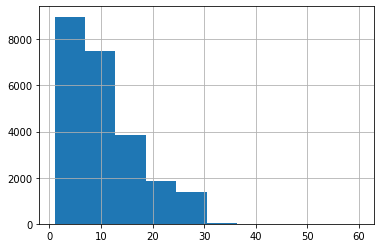

In [7]:
df['floors_total'].hist()

Из гистограммы мы видим, что наблюдения с высотой более 37 этажей почти не встречаются. 

In [8]:
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

Всего два наблюдения с высотой более 37 этажей - 60 и 52. Их можно заменить вручную, предположив, что при ручном вводе данных была допущена опечатка и имелось ввиду 6 и 5 этажей. Подобная замена не исказит результаты исследования, так как мы заменим всего 2 наблюдения из более чем 23 000.

In [9]:
pd.options.mode.chained_assignment = None 
#создаем функцию для проебразования аномальныхзначений
def f1(floor):
    if floor>37:
        return round((floor/10),0)
    else:
        return floor
    
df['floors_total']=df['floors_total'].apply(f1)    


In [10]:
df['floors_total'].describe()

count    23613.000000
mean        10.669546
std          6.584040
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

Мы избавились от аномальных значений в переменной 'floors_total' и создать категории этажности, для подсчета медианы в группах и последующей замены пропусков в 'ceiling_height'.
Для определения категорий воспульзуемся классификацией зданий по высоте и этажности согласно региональным нормативам градостроительного проектирования Ленинградской области и Санкт-Петербурга.


Обычно жилые дома и здания в России классифицируются по этажности:

- малоэтажные - 1-2 этажа;

- средней этажности - 3-5 этажа;

- многоэтажные - 6 и более этажей;

- повышенной этажности - 11-16 этажей;

- высотные - более 16 этажей.

In [11]:
#создаем функцию для создания категорий по этажности здания
def floor(number):
    if 2>=number>=1:
        return 'малоэтажные'
    elif 5>=number>=3:
        return 'средней этажности'
    elif 10>=number>=6 :
        return 'многоэтажные'
    elif 16>=number>=11 :
        return 'повышенной этажности'
    else:
        return 'высотные'

In [12]:
df['floors_group']=df['floors_total'].apply(floor) #создаем ктегории согласно этажности здания 

Заменим пропуски в *'ceiling_height'* на медианное значение с учетом этажности здания.

In [13]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floors_group')['ceiling_height'].transform('median'))

In [14]:
df['ceiling_height'].isnull().sum() #проверим наличие пропущенных перменных в 'ceiling_height' 

0

- ***Переменная 'is_apartment'***

Посмотрим какие значения принимает переменная 'is_appartment' и количество пропущенных в ней значений.

In [15]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [16]:
df['is_apartment'].isnull().sum()

20924

Мы видим большое число пропусков, можно предположить, что люди просто не заполняли строку "аппартаменты", если их квартиры не относились к данному виду недвижимости, а значит на месте данных пропусков должно быть значение "False". Проведем соответствующую замену.

In [17]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isnull().sum() #проверка пропущенных значений после замены

0

- ***Переменная 'balcony'***

В переменной *'balcony'* пропущено более 48% значений, скорее всего, в случае отсутствия балкона люди не заполняли данную графу, поэтому пропуски можно заменить на 0.

In [18]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isnull().sum()

0

- ***Переменная 'living_area'***

In [19]:
len(df.query('living_area=="NaN"'))

1903

Пропущенные значения в переменной *'living_area'* можно заменить слудующим образом: 
1. Имея, все значения общей площади кваритиры, мы можем вычислить отношение жилой площади к общей.
2. Строки с пропущенными значениями отношения жилой площади к общей, заменим медианой данного показателя согласно группе по количеству комнат.
3. Заполнив пропущенные значения на предыдущем шаге, мы имеем все значения соотношения жилой и общей площади, а также общей площади квартиры, исходя из этого, мы можем заполнить пропуски в *'living_area'*

Для начала рассмотрим переменную *'total_area'*. Минимальная площадь квартиры составляет 12 квадратных метров, снчала может показаться, что это ошибочное или некорректное значение, однако, в [источниках](https://moika78.ru/news/2019-01-14/175808-studiya-v-12-kvadratov-najdena-samaya-malenkaya-kvartira-peterburga/#:~:text=%D0%9D%D0%BE%20%D1%81%D0%B0%D0%BC%D0%B0%D1%8F%20%D0%B4%D0%B5%D1%88%D0%B5%D0%B2%D0%B0%D1%8F%20%D0%BC%D0%B8%D0%BD%D0%B8%2D%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D0%B0,%D1%80%D1%83%D0%B1%D0%BB%D0%B5%D0%B9.)
  говорится о том, что в СПб действительно продаются квартиры с подобной площадью. Также отдельными [источниками](https://www.cian.ru/stati-top-10-samyh-dorogih-kvartir-na-vtorichnom-rynke-sankt-peterburga-278076/) можно подтвердить и максимальное значение площади квартиры в 900 квадратных метров. Поэтому на данном этапе, оставим значения *'total_area'* неизменными.

In [20]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Далее рассмотрим значения по переменной *'rooms'* для дальнейшей группировки. 

In [21]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Можно заметить, что встречаются значения, где количество комнат равно нулю. Возможно, квартиры в данном случае являются студиями и люди заполняли графу с количеством комнат - 0. Проверим данную, гипотезу.

In [22]:
len(df.query('studio==True and rooms==0'))

138

Получается из 198 объявлений с нулевым количеством комнат 138 являются студиями. Посмотрим на 59 квартир с нулевым значением комнат, не являющихся студиями. 

In [23]:
df1=df.query('studio==False and rooms==0')
df1['total_area'].describe()
pd.set_option('display.max_columns', 500)
df1


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_group
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.685,14.0,17.0,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,повышенной этажности
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.750,26.0,24.3,19,False,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,высотные
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,2.750,18.0,NaN,8,False,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0,высотные
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.700,5.0,15.0,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0,средней этажности
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,2.750,27.0,18.0,7,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0,высотные
1574,0,2200000.0,22.00,2017-11-03T00:00:00,0,2.750,18.0,15.0,16,False,False,True,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0,высотные
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,2.600,4.0,10.5,3,False,False,True,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0,средней этажности
2532,5,3500000.0,27.10,2018-02-01T00:00:00,0,2.750,18.0,18.7,9,False,False,True,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0,высотные
3019,18,2100000.0,24.00,2017-11-10T00:00:00,0,2.600,10.0,18.0,6,False,False,True,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0,многоэтажные
4115,7,2600000.0,24.00,2018-02-01T00:00:00,0,2.750,25.0,18.0,4,False,False,True,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0,высотные


Мы видим что во всех данных квартирах присутствует свободная планировка. Свободная планировка квартиры — это пространство, в котором отсутствуют внутренние стены, а количество несущих опор сведено к минимуму. Соответственно, количество комнат в данных квартирах может быть любым, в зависимости от пожеланий владельца. Возможно, поэтому люди, создававшие объявления, проставляли в поле числа комнат - 0. 

Таким образом, мы нашли возможные логические объяснения нулевому значению числу комнат - либо квартиры являются студиями, либо имеют свободную планировку. Учитывая, что процент таких объявлений составляет всего 0.8% от всей выборки, оставим нулевые значения неизменными.

In [24]:
#создаем переменную соотношения жилой площади к общей
df['living_to_total']=df['living_area']/df['total_area']

In [25]:
#заполняем пропуски в соотношении жилой площади к общей медианным значением, согласно группе по числу комнат
df['living_to_total'] = df['living_to_total'].fillna(df.groupby('rooms')['living_to_total'].transform('median'))

In [26]:
#проверяем замену пропусков
df['living_to_total'].isnull().sum()

0

In [27]:
#заполняем пропуски в переменной 'living_area'
df['living_area'] = df['living_area'].fillna(df['living_to_total']*df['total_area'])
df['living_area'].isnull().sum()

0

- ***Переменная 'kitchen_area'***

In [28]:
df.query('kitchen_area==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_group,living_to_total


In [29]:
len(df.query('kitchen_area=="NaN"'))

2278

Площадь кухни входит в нежилую площадь квартиры, которую мы можем вычислить для всех наблюдений, так как уже заполнили пропуски в living_area. Также мы можем рассчитать отношение кухни к другой нежилой площади (коридоры, сан.узел и т.д.), но в данном случае у нас уже появятся пропущенные значения.Вероятнее, всего соотношения кухни и другой нежилой площади приблизительно одинкового размера в квартирах, где планировки похожи в части соотношения жилой и общей площади. На основе этого, заменим пропуски в соотношении кухни и нежилой площади медианой, соответствующей группировке по переменной 'living_to_total'. Имея все значения по соотношению кухни и другой нежилой площади, мы можем заполнить пропуски в kitchen_area.
Таким образом замена пропусков будет проходить в несколько этапов:
1. Создаем группы по соотношению жилой и общей площади, используя границы квантилей.
2. Рассчитываем нежилую площадь и соотношение площади кухни к общей нежилой площади.
3. Заполняем пропуски в соотношении лощади кухни к общей нежилой площади.
4. Заполняем пропуски в площади кухни.


In [30]:
df['living_to_total'].describe()

count    23699.000000
mean         0.564917
std          0.102745
min          0.021583
25%          0.491415
50%          0.571429
75%          0.633484
max          1.000000
Name: living_to_total, dtype: float64

In [31]:
#создаем функцию для создания групп согласно соотношению жилой и общей площади
def f2(rel):
    if rel<=0.49:
        return 'наиболее просторные'
    elif 0.57>=rel>0.49:
        return 'просторные'
    elif 0.63>=rel>0.57:
        return 'средние'
    else:
        return 'компактные'
df['group_relation']=df['living_to_total'].apply(f2)

In [32]:
#Рассчитываем нежилую площадь и соотношение площади кухни к общей нежилой площади.
df['not_living_area']=df['total_area']-df['living_area']
df['kitchen_share']=df['kitchen_area']/df['not_living_area']
#Заполняем пропуски в соотношении лощади кухни к общей нежилой площади.
df['kitchen_share'] = df['kitchen_share'].fillna(df.groupby('group_relation')['kitchen_share'].transform('median'))

In [33]:
#Заполняем пропуски в площади кухни
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_share']*df['not_living_area'])
df['kitchen_area'].isnull().sum()

0

- **'days_exposition'**

Процент пропусков по данной переменной составляет около 13%, что является достаточно высоким показателем. Пропущенные значения можно заменить медианой, которая менее подвержена влиянию аномальных значений, в отличие от среднего.

In [34]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
df['days_exposition'].isnull().sum()

0

<a id="step2-2"></a> 
### Замена типа данных

In [35]:
#Замена типа данных на целочисленный методом astype()-используем 'Int64' вместо 'int64', т.к. в некоторых переменных есть пропуски
df[['last_price','floors_total','balcony','airports_nearest',
   'cityCenters_nearest','parks_around3000','parks_nearest',
  'ponds_around3000','ponds_nearest']]=df[['last_price','floors_total','balcony','airports_nearest',
   'cityCenters_nearest','parks_around3000','parks_nearest',
  'ponds_around3000','ponds_nearest']].astype('Int64')
df['days_exposition']= pd.to_numeric(df['days_exposition'].round(), errors='coerce').astype('Int64')

In [36]:
#замена типа данных даты публикации на формат даты
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 27 columns):
total_images            23699 non-null int64
last_price              23699 non-null Int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null Int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null Int64
locality_name           23650 non-null object
airports_nearest        18157 non-null Int64
cityCenters_nearest     18180 non-null Int64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null Int64
ponds_around3000      

<a id="step2-3"></a> 
### Проверка наличия дубликатов

In [38]:
df.duplicated().sum()

0

Дублирующие строки в данных отсутствуют.

### Вывод

На этапе предобработки данных мы заполнили пропуски в перменных *'ceiling_height', 'living_area', 'kitchen_area','balcony','is_appetment'*. Также убрали аномальные значения в  *'floors_total'* , заменили тип данных в переменных, где это было необходимо, и проверили наличие дублирующих строк.

<a id="step3"></a> 
## Шаг 3. Создание новых переменных

- ***цена квадратного метра***

In [39]:
df['price_for_m2']=df['last_price']/df['total_area']

- ***день недели, месяц и год публикации объявления***

In [40]:
#день недели
df['weekday'] = df['first_day_exposition'].dt.weekday
#месяц
df['month'] = df['first_day_exposition'].dt.month
#год
df['year'] = df['first_day_exposition'].dt.year

- ***этаж квартиры; варианты — первый, последний, другой***

In [41]:
def f3(floor, total_floor):
    if floor==1:
        return 'первый'
    elif floor==total_floor:
        return 'последний'
    else:
        return 'другой'    

In [42]:
df['id_floor'] = np.vectorize(f3)(df['floor'],df['floors_total'])
df['id_floor'].value_counts()

другой       17446
последний     3336
первый        2917
Name: id_floor, dtype: int64

- ***соотношение жилой и общей площади, отношение площади кухни к общей***

Соотношение жилой и общей площади было подсчитано на этапе предобработки данных и сохранено в переменной *'living_to_total'*.

In [43]:
#отношение площади кухни к общей
df['kitchen_to_total']=df['kitchen_area']/df['total_area']

### Вывод
На данном этапе мы добавили ряд параметров, характеризующиъ недвижимость, которые пригодятся нам в дальнейшем для оценки и анлиза данных объявлений о продажи квартир в СПб и ЛО.

<a id="step4"></a> 
## Шаг 4. Исследовательский анализ

- ***Площадь***

Согласно гистограмме, представленной выше, мы видим, что наблюдений с площадью более 400 квадратных метров крайне мало. Скорее всего они являются выбросами, изучим переменную  'total_area' более детально.

In [44]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

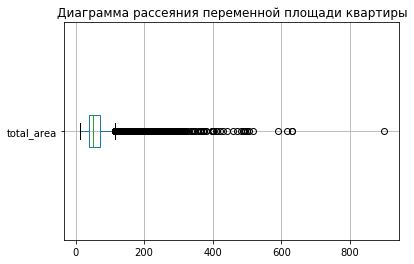

In [45]:
plt.title('Диаграмма рассеяния переменной площади квартиры')
df.boxplot(column='total_area', vert=False)
plt.show()

На этапе предобработки данных мы изучили минимальное и максимальное значения площади квартир, и пришли к выводу о том, что такие значения могут соответствовать действительности. Однако, если мы рассмотрим диаграмму размаха, то увидим большое число выбросов, которые могут повлиять на общие выводы. 

Рассчитаем границу, определяющую выбросы, используя значения межквартильного размаха, первого и третьего квартиля.

In [46]:
(69.9-40.000)*1.5+69.9


114.75000000000001

In [47]:
#подсчитаем процент аномальных значений
len(df.query('total_area>114.75'))/len(df)

0.052322882822060005

Все квартиры с площадью более 114.75 квадратных метров (около 5% значений) в данной выборке рассматриваются как выбросы. В данном случае нам следует исключить аномальные поскольку, квартиры с большей площадью зачастую представляют жилье бизнес-класса, который представляет отдельный сегмент рынка недвижимости и может исказить результаты общего анализа.


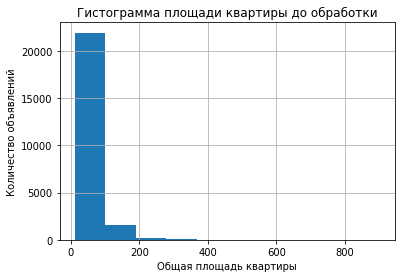

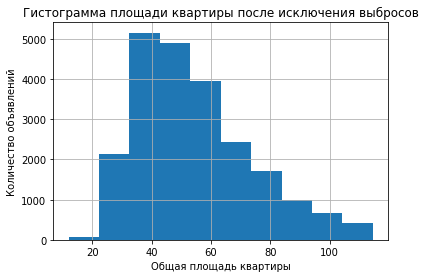

In [48]:
df['total_area'].hist()
plt.title('Гистограмма площади квартиры до обработки')
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Количество объявлений')
plt.show()

df_area=df.query('total_area<=114.75')
df_area['total_area'].hist()
plt.title('Гистограмма площади квартиры после исключения выбросов')
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Количество объявлений')
plt.show()

После удаления аномальных значений гистограмма площади квартиры стала более напоминать нормальное распределение Гаусса.

- ***Цена***

In [49]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

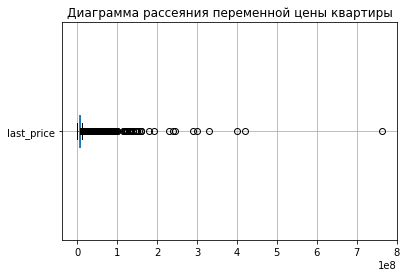

In [50]:
df.boxplot(column='last_price', vert=False)
plt.title('Диаграмма рассеяния переменной цены квартиры')
plt.show()

На диаграмме рассеяния мы видим большое количество выбросов по переменной цены. Рассчитаем границу, после которой значения приравниваются к аномальным.

In [51]:
(6.800000e+06-3.400000e+06)*1.5+6.800000e+06

11900000.0

In [52]:
len(df.query('last_price > 11900000'))/len(df)

0.08582640617747585

Аномальные значения составляют около 8.6% выборки. Квартиры с аномально высокими ценами могут также представлять недвижимость бизнес класса, соответсвенно по аналогии с переменной площади, мы удалим данные выбивающиеся значения.

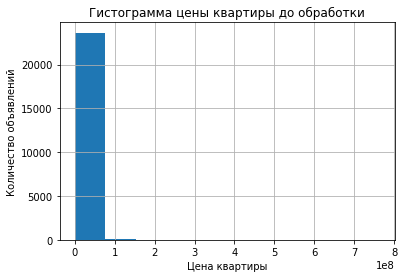

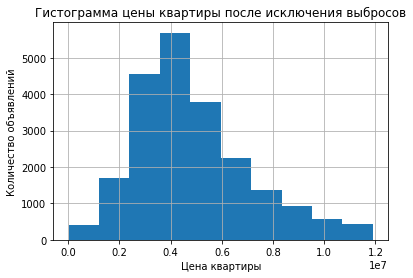

In [53]:
df['last_price'].hist()
plt.title('Гистограмма цены квартиры до обработки')
plt.xlabel('Цена квартиры')
plt.ylabel('Количество объявлений')
plt.show()

df_price=df.query('last_price <= 11900000')
df_price['last_price'].hist()
plt.title('Гистограмма цены квартиры после исключения выбросов')
plt.xlabel('Цена квартиры')
plt.ylabel('Количество объявлений')
plt.show()

После удаления аномальных значений распределение цены квартиры стало ближе к нормальному распределению Гаусса.

- ***Число комнат***

In [54]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

На этапе предобработки данных мы объяснили почему число комнат может принимать нулевое значение. Теперь рассмотрим аномально большое чило комнат. Для начала построим диаграмму рассеяния.

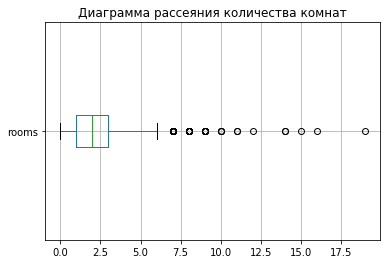

In [55]:
df.boxplot(column='rooms', vert=False)
plt.title('Диаграмма рассеяния количества комнат')
plt.show()

Рассчитаем границу, после которой значения будут считаться выбросами.

In [56]:
(3-1)*1.5+3

6.0

In [57]:
len(df.query('rooms > 6'))/len(df)

0.00379762859192371

Квартиры с количеством комнат более 6 считаются выбросами. Доля таких выбросов составляет около 0.3% от всей выборки, поэтому мы можем исключить данные значения без искажения резултатов анализа в дальнейшем.

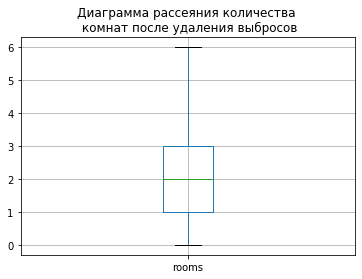

In [58]:
df_rooms=df.query('rooms<=6')
df_rooms.boxplot(column='rooms')
plt.title('Диаграмма рассеяния количества \n комнат после удаления выбросов')
plt.show()

После удаления аномальных значений, выбросов на диаграмме рассеяния не осталось.

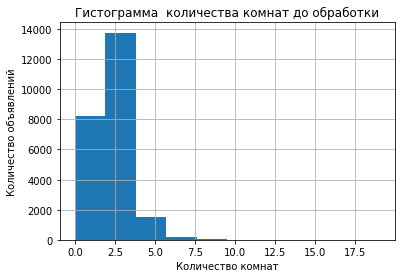

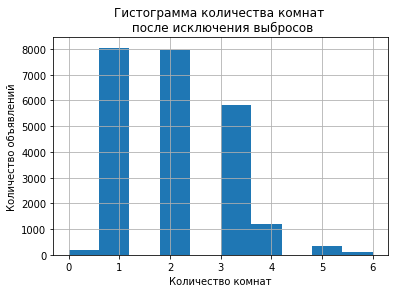

In [59]:
df['rooms'].hist()
plt.title('Гистограмма  количества комнат до обработки')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()



df_rooms['rooms'].hist()
plt.title('Гистограмма количества комнат \n после исключения выбросов')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

- ***Высота потолков***

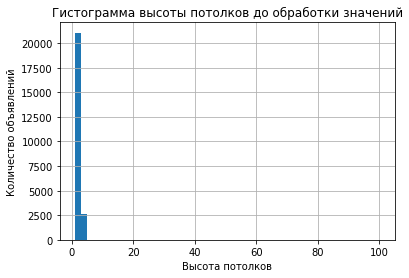

In [60]:
an=df['ceiling_height'].hist(bins=50)
plt.title('Гистограмма высоты потолков до обработки значений')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

На гистограмме мы видим что у большинства квартир высота потолков приблизительно не более 5м, остальные значения почти не встречаются.

In [61]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.726239
std          0.988979
min          1.000000
25%          2.600000
50%          2.600000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Из описателньой статистики мы видим, что минимальное значение - 1м, что не может соответствовать действительности. Согласно нормам жилых помещений, высота потолков не может составлять менее 2,5м - прмем данную величину за минимально допустимое значение и заменим все значения меньше на 2.5 м. Максимальное значение в 100 метров также маловероятно, определи верхнюю границу выбросов.

In [62]:
(2.75-2.6)*1.5+2.75

2.9749999999999996

In [63]:
1-len(df.query('3>=ceiling_height>=2.5'))/len(df)

0.06759778893624202

Около 6.8% аномальных значений - заменим их на медиану, так как высота потолков величина относительно стандартная и имеет меньший размах.

In [64]:
df.loc[df['ceiling_height'] > 3 , 'ceiling_height'] = df['ceiling_height'].median()
df.loc[df['ceiling_height'] <2.5 , 'ceiling_height'] = df['ceiling_height'].median()

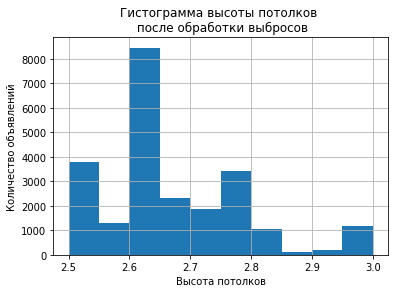

In [65]:
b=df['ceiling_height'].hist()
plt.title('Гистограмма высоты потолков \n после обработки выбросов')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

- ***время продажи квартиры***

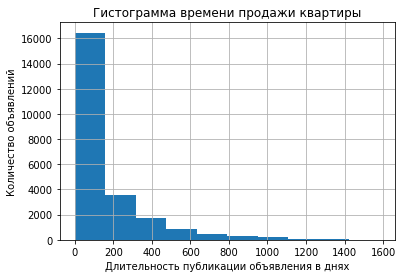

In [66]:
df['days_exposition'].hist()
plt.title('Гистограмма времени продажи квартиры')
plt.xlabel('Длительность публикации объявления в днях')
plt.ylabel('Количество объявлений')
plt.show()


Согласно гистограмме, большинство объявлений из выборки снимается не позднее чем через 230 дней. Крайне малое количество объявлений снимается с публикации после 800 дней и более. Изучим данную величину более подробно, расммотрев среднее значение и медиану.

In [67]:
df['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Три четверти объявлений о продажи квартир снимается не позднее чем через 199 дней, что составляет примерно 6.6 месяцев, при этом половина квартир продается не более чем за 45 дней. Однако, необходимо отметить, что медиана времени продажи квартиры почти в два раза меньше среднего значения, а также можно заметить большое стандартное отклонение. Все это свидетельствует о наличии аномальных значений по данной переменной. Проверим их наличие на диаграмме рассеяния.

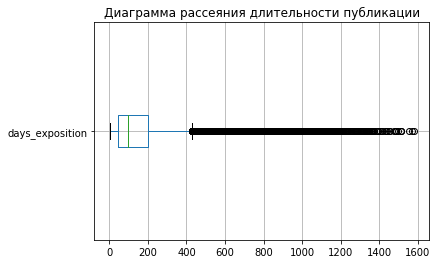

In [68]:
df.boxplot(column='days_exposition', vert=False)
plt.title('Диаграмма рассеяния длительности публикации')
plt.show()

In [69]:
#подсчитаем верхнюю границу правого "уса" ящика
(199-45)*1.5+199


430.0

Квартиры, продающиеся дольше 430 дней (или 1 год и 2 месяца)  являются аномальными значениями в данной выборке. Данный факт весьма может соответствовать действительности, так как квартира, с которой все в порядке, навряд ли будет продаваться более 1 года. 

Также стоит рассмотреть и минимальный срок продажи квартиры. Учитывая, что покупка квартиры это весьма крупная и серьезная сделка, маловероятно, что, например,меньше чем за 2 недели удастся продать недвижимость, так как покупателям необходимо больше времени, чтобы удостовериться в добросовестности продавца, запросив у него определенные документы, или же согласовать с банком ипотеку на приобретение данной квартиры. Более того, продажа квартиры может являться не прямой, то есть продавец так же находится в поиске новой недвижимости для себя, и сделка состоится только в случае, когда успешно реализуется вся цепочка купле-продаж жилья. На основе этого проведем условную минимальную границу срока размещения объявления в 2 недели или 14 дней, будем считать что это минимальный срок продажи квартиры с учетом того, что для этого сложись все благоприятные условия. Объявления, которые были размещены менее трех недель, будем считать подозрительными и возможно связанными с мошенническими операциями, а значит также причислим их к аномальным значениям.  

In [70]:
len(df.query('days_exposition<14 or days_exposition>430'))/len(df)

0.16675809105869446

In [71]:
df_days=df.query('430>=days_exposition>=14')

Не смотря на то, что установленные нами ограничения, исключили около 16% выборки, мы удалили значения, которые с малой вероятностью могли отражать сроки продажи квартиры на реальном рынке недвижимсоти.

***Создадим выборку на основе обработки аномальных значений всех рассмотренных переменных.***

In [72]:
df_new=df.query('430>=days_exposition>=14 and rooms<=6 and last_price <= 11900000 and total_area<=114.75')

1-len(df_new)/len(df)

0.2419089413055403

### Вывод

После обработки аномальных значений, мы удалили около 24% значений всей выборки. Несмотря на это, объем выборки по прежнему остается достаточно большим для проведения дальнейшего анализа, при этом нам удалось избавиться от значений, которые маловероятно могли соответствовать действительности рынка недвижимости и при этом способоствовать искажению результатов исследования.

### Зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра?

In [73]:
#Рассчитаем коэффициент корелляции Пирсона
df_new[['last_price','total_area','rooms','cityCenters_nearest']].corr(method='pearson')

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.693895,0.430784,-0.341022
total_area,0.693895,1.000000,0.803201,-0.116971
rooms,0.430784,0.803201,1.000000,-0.068623
cityCenters_nearest,-0.341022,-0.116971,-0.068623,1.000000


Основываясь на коэффициентах корреляции можно сделать следующие выводы: 
- в первую очередь на цену квартиры влияет её площадь (высокая сила связи)
- далее цену квартиры определяет количество комнат, однако со значительно меньшим влиянием (слабая сила связи)
- еще меньше влияет расстояние до центра (сила связи слабая, отрицательный знак говорит об обратном характере взаимосвязи)

Далее рассмотрим взаимосвязь цены и различных параметров, используя графические методы.

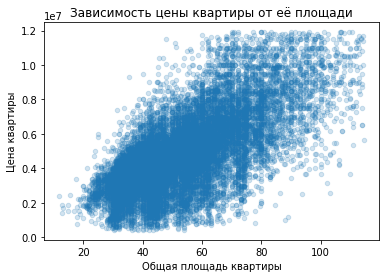

In [74]:
df_new.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2) 
plt.ylabel('Цена квартиры')
plt.xlabel('Общая площадь квартиры')
plt.title('Зависимость цены квартиры от её площади')
plt.show()

На графике мы видим, что с увеличением площади одновременно растет цена. Данная зависимость весьма ожидаема. Ее подтверждает и коэффициент корреляции 0.69 - который свидетельствует о высокой силе взаимосвязи.

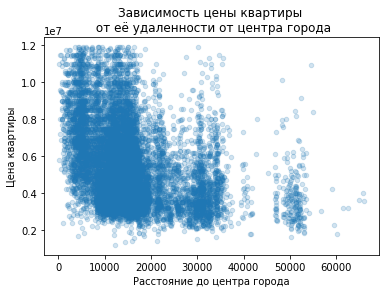

In [75]:
df_new.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.2) 
plt.ylabel('Цена квартиры')
plt.xlabel('Расстояние до центра города')
plt.title('Зависимость цены квартиры \n от её удаленности от центра города')
plt.show()

Чем меньше расстояние от квартиры до центра города, тем выше её цена. Характер данной связи подтверждается и коэффициентом корреляции, который является отрицательным, однако при этом его величина -0.34, говорит об очень слабой взаимосвязи.

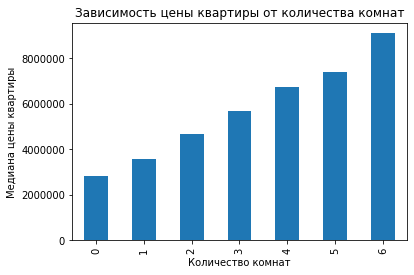

In [76]:
data_rooms=df_new.pivot_table(index='rooms', values='last_price', aggfunc='median')
data_rooms.plot(kind='bar')
plt.ylabel('Медиана цены квартиры')
plt.xlabel('Количество комнат')
plt.title('Зависимость цены квартиры от количества комнат')
plt.legend().remove()


C увеличением количества комнат медианная цена квартиры увеличивается.Однако если мы посмотрим на корреляционную матрицу, то коэффициент 0.43 свидетельствует о слабой связи.

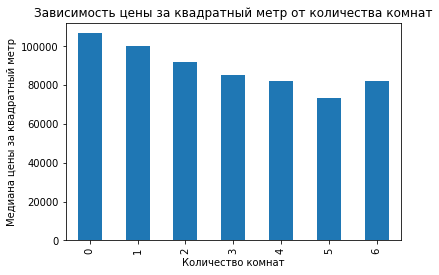

In [77]:
data_rooms=df_new.pivot_table(index='rooms', values='price_for_m2', aggfunc='median')
data_rooms.plot(kind='bar')
plt.ylabel('Медиана цены за квадратный метр')
plt.xlabel('Количество комнат')
plt.title('Зависимость цены за квадратный метр от количества комнат')
plt.legend().remove()

In [78]:
df_new.pivot_table(index='rooms', values='price_for_m2', aggfunc=['count','median'])

,count,median
,price_for_m2,price_for_m2
rooms,,
0,160,106689.949202
1,6662,100000.000000
2,6409,91666.666667
3,4091,85257.548845
4,593,81976.744186
5,48,73385.345997
6,3,81981.981982


Наиболее высокая цена за квадратный метр в студиях и однокомнатных квартирах. Насчет 5-6 комнатных квартир сделать выводы нельзя ввиду малого количества наблюдений. В целом, чем меньше комнат в квартире, тем выше цена за квадратный метр в ней. 

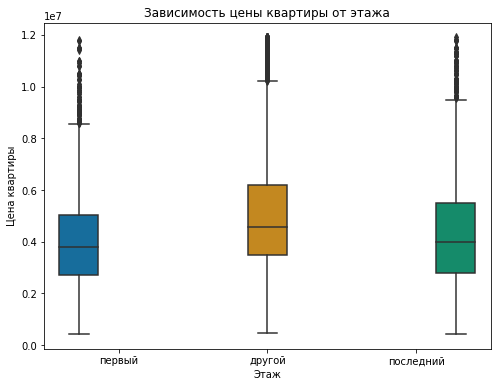

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(y='last_price', x='id_floor',data=df_new,palette="colorblind",hue='id_floor')
plt.legend().remove()
plt.ylabel('Цена квартиры')
plt.xlabel('Этаж')
plt.title('Зависимость цены квартиры от этажа')
plt.show()

Сравнив медианные значения на столбчатом графике и диаграмме рассеяния мы видим что, если этаж не первый и не последний, то цена за квартиру будет выше. При этом цена на последний этаж будет выше цены на первый.

- ***День недели публикации***

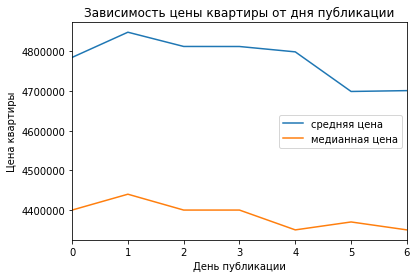

In [80]:
data_floor=df_new.pivot_table(index='weekday', values='last_price', aggfunc=['mean','median'])
data_floor.plot()
plt.legend(['средняя цена', 'медианная цена'])
plt.ylabel('Цена квартиры')
plt.xlabel('День публикации')
plt.title('Зависимость цены квартиры от дня публикации')
plt.show()

Будем проводить анализ по медианной цене, так как она менее подвержена искажению: наиболее высокая цена у объявлений, публикуемых во вторник, самая низкая цена у объявлений, опубликованных в пятницу. В целом, значительные колебания цены со сменой дня недели публикациии не наблюдаются.

- ***Месяц публикации***

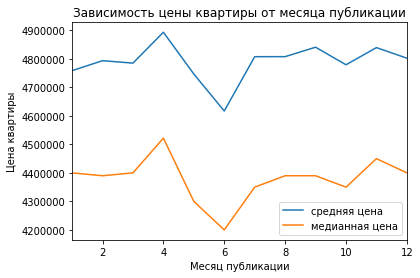

In [81]:
data_floor=df_new.pivot_table(index='month', values='last_price', aggfunc=['mean','median'])
data_floor.plot()
plt.legend(['средняя цена', 'медианная цена'])
plt.ylabel('Цена квартиры')
plt.xlabel('Месяц публикации')
plt.title('Зависимость цены квартиры от месяца публикации')
plt.show()

In [82]:
df_new.pivot_table(index='month', values='last_price', aggfunc=['count','median'])

,count,median
,last_price,last_price
month,,
1,1129,4400000
2,2097,4390000
3,1927,4400000
4,1842,4522000
5,949,4300000
6,1323,4200000
7,1282,4350000
8,1353,4390000


Наиболее высокая цена у объявлений, пбликуемых в апреле, наименьшая - в июне. Зависимость цены от месяца публикации наиболее выражена по сравнению с зависимостью от дня недели. Данный факт объясним тем, что рынок недвижимости не отличается сильной волатильностью, например как биржевой рынок, где цена акций может значительно меняться каждый.

- ***Год публикации***

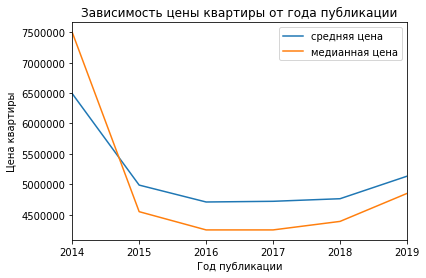

In [83]:
data_floor=df_new.pivot_table(index='year', values='last_price', aggfunc=['mean','median'])
data_floor.plot()
plt.legend(['средняя цена', 'медианная цена'])
plt.ylabel('Цена квартиры')
plt.xlabel('Год публикации')
plt.title('Зависимость цены квартиры от года публикации')
plt.show()

In [84]:
df_new.pivot_table(index='year', values='last_price', aggfunc=['count','median'])

,count,median
,last_price,last_price
year,,
2014,7,7500000
2015,336,4550000
2016,1751,4250000
2017,6446,4250000
2018,7119,4390000
2019,2307,4850000


На графике мы видим, что в 2014 году квартиры стоили значительно дороже, чем в 2015, однако средние и медианное значение цены 2014 году нельзя считать стистически значимым, так как за данный период в выборке присуттсвует всего 7 наблюдений. В остальном, начиная с 2016 года цена на рынке недвижимости имеет постоянную тенденцию роста.

***Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.***

In [85]:
df_new['locality_name'].value_counts().head(10)


Санкт-Петербург      11278
посёлок Мурино         430
посёлок Шушары         372
Всеволожск             338
Колпино                286
Пушкин                 284
посёлок Парголово      275
Гатчина                250
деревня Кудрово        233
Выборг                 198
Name: locality_name, dtype: int64

In [86]:
our_dict={"Санкт-Петербург","посёлок Мурино","посёлок Шушары","Всеволожск","Колпино",
          "Пушкин","посёлок Парголово","Гатчина", "деревня Кудрово","Выборг"}

In [87]:
top_10=df_new.query('locality_name in @our_dict')

In [88]:
top_10.pivot_table(index='locality_name', values='price_for_m2',aggfunc=['count','median'])

,count,median
,price_for_m2,price_for_m2
locality_name,,
Всеволожск,338,65843.495935
Выборг,198,58233.006089
Гатчина,250,67123.541888
Колпино,286,74324.324324
Пушкин,284,98547.274643
Санкт-Петербург,11278,102322.408706
деревня Кудрово,233,92592.583333
посёлок Мурино,430,86270.673555


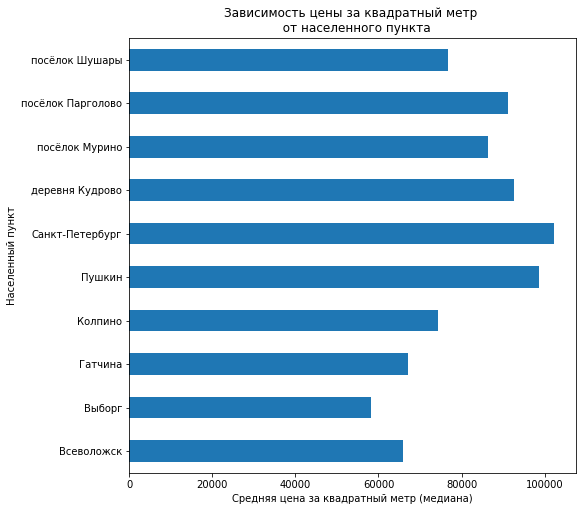

In [89]:
top_10.pivot_table(index='locality_name', values='price_for_m2',aggfunc='median').plot(kind='barh',figsize=(8,8))
plt.ylabel('Населенный пункт')
plt.xlabel('Средняя цена за квадратный метр (медиана)')
plt.title('Зависимость цены за квадратный метр \n  от населенного пункта')
plt.legend().remove()

Наиболее высокая цена за квадратный метр в Санкт-Петербурге, Пушкине и поселке Кудрово. Наиболее низкая цена за квадратный метр в Гатчине, Всеволжске и Выборге.

***Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.***

In [90]:
#создаем срез данных по СПб
spb=df_new.query('locality_name=="Санкт-Петербург"')

In [91]:
#создаем столбец с расстоянием до центра в км
spb['km']=(spb['cityCenters_nearest']/1000).round(0)
spb['km'].value_counts()

12.0    1278
15.0    1250
13.0    1138
16.0    1045
14.0    1012
11.0     883
17.0     692
10.0     542
5.0      442
9.0      416
8.0      385
4.0      339
6.0      330
7.0      247
18.0     211
3.0      197
22.0     172
2.0      134
19.0     132
21.0     100
23.0      70
1.0       63
26.0      50
20.0      43
24.0      25
25.0      24
0.0        8
28.0       7
29.0       3
27.0       1
Name: km, dtype: int64

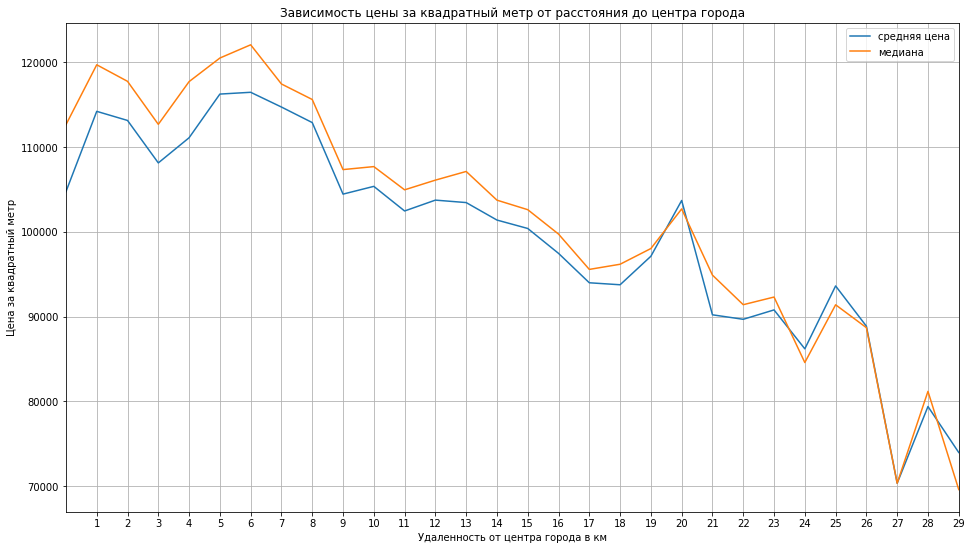

In [92]:
spb.pivot_table(index='km',values='price_for_m2', aggfunc=['median','mean']).plot(figsize=(16,9),grid=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,26,27,28,29])
plt.legend(['средняя цена', 'медиана'])
plt.ylabel('Цена за квадратный метр')
plt.xlabel('Удаленность от центра города в км')
plt.title('Зависимость цены за квадратный метр от расстояния до центра города')
plt.show()



Граница, на которой происходит значительное изменение цены и в дальнейшем заметна тенденция снижения, отмечается в точке 8 километров. 8 км-радиус расположения квартир, которые будут считаться наиболее близкими к центру города.

***Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?***

In [93]:
# сегмент квартир в центре
center=spb.query('km<=8')
len(center)

2145

In [94]:
center[['total_area','last_price','rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,2145.000000,2.145000e+03,2145.000000,2145.000000
mean,63.196159,7.207107e+06,2.234965,2.683417
std,20.602566,2.168126e+06,0.943254,0.144538
min,12.000000,1.686000e+06,0.000000,2.500000
25%,46.500000,5.599000e+06,2.000000,2.600000
50%,61.500000,7.050000e+06,2.000000,2.600000
75%,78.000000,8.800000e+06,3.000000,2.750000
max,114.200000,1.190000e+07,6.000000,3.000000


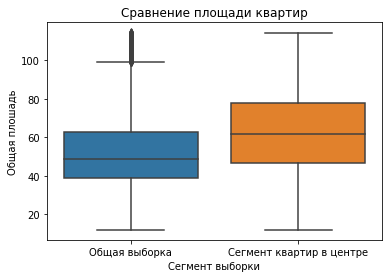

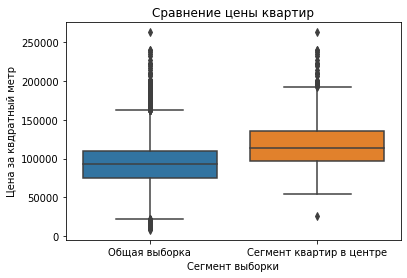

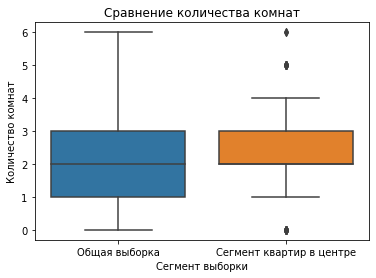

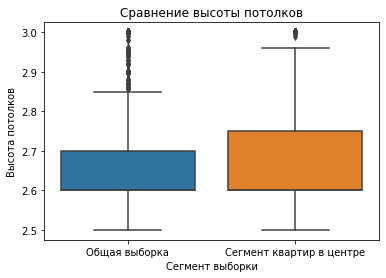

In [99]:
dict_label= {'total_area':{'title':'Сравнение площади квартир','ylabel':'Общая плошадь'},
            'price_for_m2': {'title':'Сравнение цены квартир','ylabel':'Цена за квдратный метр'},
             'rooms':{'title':'Сравнение количества комнат','ylabel':'Количество комнат'},
             'ceiling_height':{'title':'Сравнение высоты потолков','ylabel':'Высота потолков'}}

for key, value in dict_label.items():
    ax = sns.boxplot(y=key, x='Location', data=cdf)
    plt.xlabel('Сегмент выборки')
    plt.ylabel(value['ylabel'])
    plt.title(value['title'])
    plt.show()

Средняя площадь квартир (медианное значение) в центре больше примерно на 10 квадратных метров в сравнении с общей выборкой.

Медианное значение цены за квадратный метр выше у квартир в центре города, что весьма ожидаемо, так как в центре города хороша развита инфраструктура, много достопримечательностей и т.д.

Половина квартир из центра являются двухкомнатными, при этом крайне мало однокомнатных и студий. В то время как в общей выборке четверть наблюдений являются однокомнатными квартирами или студиями.

Несмотря на то, что медианное значение высоты потолков у выборок совпадают, в целом - высота потолков у квартир в центре выше, это может объясняться тем, что в центре Петербурга в основном - сарый исторический жилой фонд, архитектуре которого свойственны высокие потолки.

In [100]:
center[['last_price','total_area','rooms','cityCenters_nearest']].corr(method='pearson')

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.719818,0.466182,-0.176519
total_area,0.719818,1.000000,0.796767,-0.195348
rooms,0.466182,0.796767,1.000000,-0.173830
cityCenters_nearest,-0.176519,-0.195348,-0.173830,1.000000


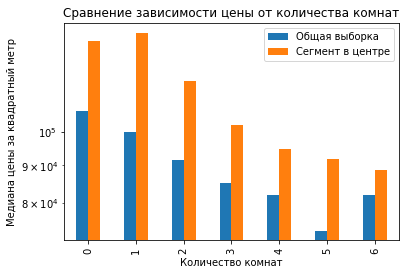

In [101]:
dfr=df_new.pivot_table(index='rooms', values='price_for_m2', aggfunc='median')
dfcc=center.pivot_table(index='rooms', values='price_for_m2', aggfunc='median')
a=dfr.merge(dfcc, on='rooms')
a.plot.bar(logy=True)
plt.ylabel('Медиана цены за квадратный метр')
plt.xlabel('Количество комнат')
plt.title('Сравнение зависимости цены от количества комнат')
plt.legend(['Общая выборка', 'Сегмент в центре'])
plt.show()

In [102]:
dfr=df_new.pivot_table(index='rooms', values='price_for_m2', aggfunc=['median','count'])
dfcc=center.pivot_table(index='rooms', values='price_for_m2', aggfunc=['median','count'])
a=dfr.merge(dfcc, on='rooms')
a

,median_x,count_x,median_y,count_y
,price_for_m2,price_for_m2,price_for_m2,price_for_m2
rooms,,,,
0,106689.949202,160,132796.610169,18
1,100000.000000,6662,136417.112299,478
2,91666.666667,6409,117283.950617,839
3,85257.548845,4091,102060.221870,621
4,81976.744186,593,94801.235442,172
5,73385.345997,48,91904.761905,15
6,81981.981982,3,88718.263718,2


У обеих выборок одна из наиболее высоких цен за квадратный метр у однокомнатных квартир. У общей выборки самая высокая цена за кв м у студий. Студии в центре весьма редко встречаются, поэтому по ним недостаточно данных для релевантного сравнения. Также в обеих выборках мало наблюдений для соответствующих выводов о 5-6 комнатных квартирах.

- ***Сравнение зависимости цены от этажа***

In [103]:
new=df_new.pivot_table(index='id_floor', values='price_for_m2', aggfunc='median')
cfloor=center.pivot_table(index='id_floor', values='price_for_m2', aggfunc='median')

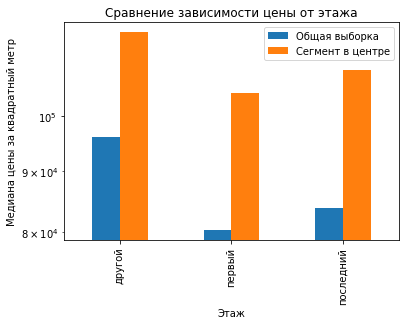

In [104]:
ar=new.merge(cfloor, on='id_floor')
g=ar.plot.bar(logy=True)
plt.ylabel('Медиана цены за квадратный метр')
plt.xlabel('Этаж')
plt.title('Сравнение зависимости цены от этажа')
plt.legend(['Общая выборка', 'Сегмент в центре'])
plt.show()

Исходя из представленного выше графика, мы можем говорить о том, что выводы о зависимости цены для общей выборки и сегмента квартир в центре совпадают: если этаж не первый и не последний, то цена за квартиру будет выше, при этом цена на последний этаж будет выше цены на первый.

- ***Сравнение зависимости цены от дня публикации***

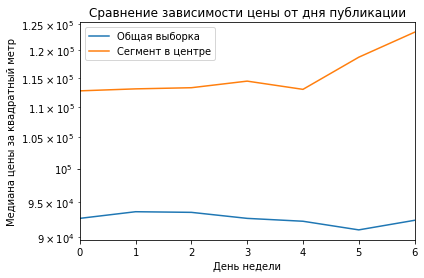

In [105]:
dfw=df_new.pivot_table(index='weekday', values='price_for_m2', aggfunc='median')
dfce=center.pivot_table(index='weekday', values='price_for_m2', aggfunc='median')
ak=dfw.merge(dfce, on='weekday')
g=ak.plot(logy=True)
plt.ylabel('Медиана цены за квадратный метр')
plt.xlabel('День недели')
plt.title('Сравнение зависимости цены от дня публикации')
plt.legend(['Общая выборка', 'Сегмент в центре'])
plt.show()

На основе представленного графика можно сделать вывод о том, что для сегмента квартир в центре зависимость цены от дня публикации наиболее выражена в сравнении с общей выборкой. Тенденция роста цены у сегмента квартир в центре начинается у объявлений, опубликванных в пятницу. Наиболее высокая цена у квартир в центре, объявления о которых были опубликованы в воскресенье. Что же касается общей выборки, то у неё не наблюдается зависимости цены от дня публикации.

- ***Сравнение зависимости цены от месяца публикации***

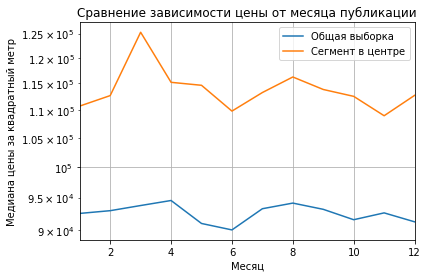

In [106]:
dfy=df_new.pivot_table(index='month', values='price_for_m2', aggfunc='median')
dfcen=center.pivot_table(index='month', values='price_for_m2', aggfunc='median')
ak=dfy.merge(dfcen, on='month')
g=ak.plot(logy=True,grid=True)
plt.ylabel('Медиана цены за квадратный метр')
plt.xlabel('Месяц')
plt.title('Сравнение зависимости цены от месяца публикации')
plt.legend(['Общая выборка', 'Сегмент в центре'])
plt.show()

Из представленного выше графика, мы видим, что зависимость цены от месяца публикации примерно одинаковая в обоих выборках, однако отличается месяц с наиболее высокой ценой: для сегмента квартир в центре - это март, а для общей выборки - апрель.

- ***Сравнение зависимости цены от года публикации***

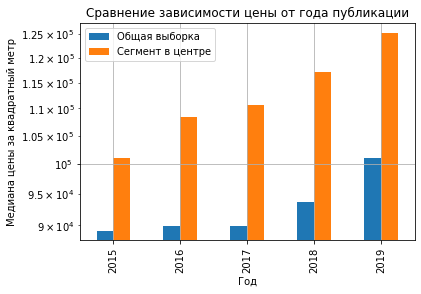

In [107]:
dfym=df_new.pivot_table(index='year', values='price_for_m2', aggfunc='median')
dfcent=center.pivot_table(index='year', values='price_for_m2', aggfunc='median')
ak=dfym.merge(dfcent, on='year')
g=ak.plot.bar(logy=True,grid=True)
plt.ylabel('Медиана цены за квадратный метр')
plt.xlabel('Год')
plt.title('Сравнение зависимости цены от года публикации')
plt.legend(['Общая выборка', 'Сегмент в центре'])
plt.show()

В обоих выборках наблюдается устойчивая тенденция роста цен на жилье в течение последних 5 лет. Однако в 2017 году на общем рынке недвижимости было незначительное снижение цены за квадратный метр.

In [108]:
dfym=df_new.pivot_table(index='year', values='price_for_m2', aggfunc=['count','median'])
dfcent=center.pivot_table(index='year', values='price_for_m2', aggfunc=['count','median'])
dfym.merge(dfcent, on='year')

,count_x,median_x,count_y,median_y
,price_for_m2,price_for_m2,price_for_m2,price_for_m2
year,,,,
2015,336,89207.065228,51,101020.408163
2016,1751,89965.397924,232,108333.333333
2017,6446,89899.960576,810,110723.150496
2018,7119,93750.000000,801,117079.646018
2019,2307,101092.896175,251,125250.836120


На сравнительной столбчатой диаграмме мы видим, что у сегмента квартир в центре цена растет с каждым последующим годом, в то время, как медианная цена общей выборки незначительно снизилась 2017 году,а затем также приняла тендецию роста в последующих периодах.

### Вывод

На данном этапе мы изучили основные параметры квартиры, которые определяют её стоимость. Выделили населенные пункы с наиболее высокой и низкой ценой на недвижимость. Также опредили сегмент квартир, расположенных в центре и сравнили как параметры недвижимость, так и порядок её ценообразования с выводами об общем рынке недвижимости в СПб и ЛО.

<a id="step5"></a> 
## Шаг 5. Общий вывод

На основе анализа данных сервиса Яндекс.Недвижимость мы можем сделать следующие выводы о рынке недвижимости в Санкт-Петербурге и Ленинградской области:
 - наиболее высокая цена за квадратный метр у однокомнатных квартир и студий;
 - если этаж не первый и не последний, то цена за квартиру будет выше; при этом цена на последний этаж будет выше цены на первый;
 - цена продажи квартиры не зависит от дня недели публикации объявления, в данном случае бОльшую роль играет либо месяц, либо год продажи, так как рынок недвижимости не отличается высокой волатильностью;
 - наиболее высокая цена за квадратный метр в: Санкт-Петербурге, Пушкине и поселке Кудрово, наиболее низкая - в Гатчине, Всеволжске и Выборге;
 - наиболее дорогие квартиры в Санкт-Петербурге находятся в радиусе 8 км от центра города;
 - для квартир в центральном сегменте характерны более высокие потолки, бОльшая площадь, и малое количество однокмнатных квартир и студий, что может характеризоваться особенностью планировок исторического жилого фонда;
 - в целом, за последние годы на рынке недвижимости в Санкт-Петербурге и ЛО наблюдается устойчивая тенденция роста цен.